In [108]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

In [109]:
def lorenz_func(sig,beta,r,xvec):
    x1 = sig*(xvec[1]-xvec[0])
    x2 = r*xvec[0]-xvec[0]*xvec[2]-xvec[1]
    x3 = -beta*xvec[2]+xvec[0]*xvec[1]
    return np.array([x1,x2,x3])

In [110]:
def amat(sig,beta,r,xvec):
    am = np.zeros((3,3))
    
    am[0,0] = -sig
    am[0,1] = sig
    
    am[1,0] = r-xvec[2]
    am[1,1] = -1.
    am[1,2] = -xvec[0]
    
    am[2,0] = xvec[1]
    am[2,1] = xvec[0]
    am[2,2] = -beta
    
    return am

In [111]:
def qt_a_q(qmat,amat):
    return np.matmul(qmat.T,np.matmul(amat,qmat))

In [112]:
def rhs_mat(qmat,amat):
    Lmat = np.tril(qt_a_q(qmat,amat))
    Lmat -= Lmat.T
    return np.matmul(qmat,Lmat)

In [113]:
def Q_rk4_step(sig,beta,r,qmat,xvec,dt):
    amat1 = amat(sig,beta,r,xvec)
    k1 = dt*lorenz_func(sig,beta,r,xvec)
    k1m = dt*rhs_mat(qmat,amat1)
    
    amat2 = amat(sig,beta,r,xvec+k1/2.)
    k2 = dt*lorenz_func(sig,beta,r,xvec+k1/2.)
    k2m = dt*rhs_mat(qmat+k1m/2.,amat2)
    
    amat3 = amat(sig,beta,r,xvec+k2/2.)
    k3 = dt*lorenz_func(sig,beta,r,xvec+k2/2.)
    k3m = dt*rhs_mat(qmat+k2m/2.,amat3)
    
    amat4 = amat(sig,beta,r,xvec+k3)
    k4 = dt*lorenz_func(sig,beta,r,xvec+k3)
    k4m = dt*rhs_mat(qmat+k3m,amat4)
    
    xvec += (k1+2.*(k2+k3)+k4)/6.
    qmat += (k1m+2.*(k2m+k3m)+k4m)/6.
    
    qmatf,rmat = np.linalg.qr(qmat)
    amatf = amat(sig,beta,r,xvec)
    qtaqf = qt_a_q(qmatf,amatf)
    
    return [xvec,qmatf,qtaqf.diagonal()]

In [114]:
def lorenz_lyap_solv(sig,beta,r,x0,dt,tf):
    qmat = np.identity(3)
    nmax = int(np.round(tf/dt))
    tvals = np.linspace(0,tf,nmax+1)
    xvals = np.zeros((3,nmax+1))
    xvals[:,0] = x0
    xvec = x0
    qavals = np.zeros((3,nmax+1))
    qavals[:,0] = np.array([-sig,-1.,-beta])
    
    for jj in xrange(0,nmax):
        update = Q_rk4_step(sig,beta,r,qmat,xvec,dt)
        xvec = update[0]
        qmat = update[1]
        xvals[:,jj+1] = xvec
        qavals[:,jj+1] = update[2]
    
    lypvals = 1./(2.*nmax)*(qavals[:,0]+qavals[:,nmax]+2*np.sum(qavals[:,1:nmax],axis=1))
    
    fig = plt.figure(figsize=(8, 6)) 
    gs = gridspec.GridSpec(3, 1)
    
    a0 = plt.subplot(gs[0])
    a0.plot(tvals,xvals[0,:])
    a0.set_xlabel('$t$')
    a0.set_ylabel('$x(t)$')
    
    a1 = plt.subplot(gs[1])
    a1.plot(tvals,xvals[1,:])
    a1.set_xlabel('$t$')
    a1.set_ylabel('$y(t)$')
    
    a2 = plt.subplot(gs[2])
    a2.plot(tvals,xvals[2,:])
    a2.set_xlabel('$t$')
    a2.set_ylabel('$z(t)$')
    
    plt.tight_layout()
    print "First Lyupanov exponent is: %1.15f" % lypvals[0]
    print "Second Lyupanov exponent is: %1.15f" % lypvals[1]
    print "Third Lyupanov exponent is: %1.15f" % lypvals[2]

First Lyupanov exponent is: 1.234620126327668
Second Lyupanov exponent is: 0.008560884218041
Third Lyupanov exponent is: -22.243181010545708


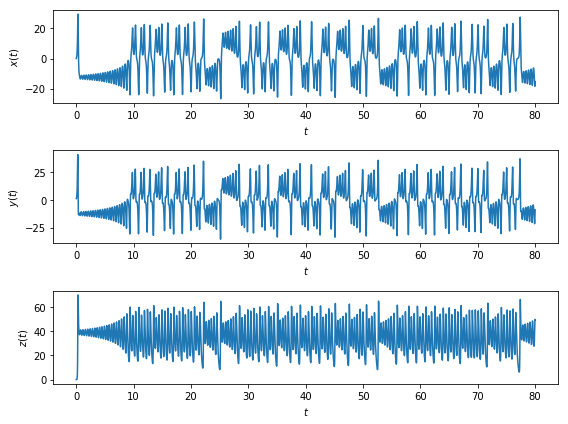

In [107]:
lorenz_lyap_solv(16.,4.,40.0,np.array([0.,1.,0.]),1e-2,80.)